In [43]:
#!pip install swiftviz
#!pip install mlxtend
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import statsmodels.api as sm



from sklearn.linear_model import Lasso,LassoCV, lasso_path,LogisticRegression,LogisticRegressionCV 

import swiftviz as sv #pip install swiftviz
from mlxtend.plotting import plot_confusion_matrix

from sklearn.svm import l1_min_c
from time import time


sns.set_style("darkgrid")

In [44]:

def import_dataset(filename):
    return pd.read_stata(filename)

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance = sk.metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = sk.metrics.mean_absolute_error(y_true, y_pred) 
    mse = sk.metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error = sk.metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error = sk.metrics.median_absolute_error(y_true, y_pred)
    r2=sk.metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print("median_absolute_error", round(median_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

    
df = import_dataset("TPA_12_full-1.dta")


In [45]:
df.describe()

,index,code,i_3_sex,age,birthweight,chronihealth,who_bmi_2cat,cp_gm2new,siblings_old,bmi_comb_over,...,iii_7_outtime_toth,toys_fixed,toys_mobile,cc_days,livarea,total_environment_safety,v_4_dog,season_new,urban,tpa15_a1_cpm
count,16277.000000,16277.000000,16277.000000,16277.000000,16258.000000,16261.000000,16272.000000,16218.000000,16264.000000,16246.000000,...,16250.000000,16264.000000,16264.000000,16264.000000,16252.000000,16244.000000,16253.000000,16277.000000,16264.000000,16277.000000
mean,8138.000000,2235.720403,0.539043,3.910959,33.017845,0.081791,0.250922,0.045607,0.430030,0.529423,...,2.399082,1.607231,4.407609,2.844411,30.688732,12.532730,0.065342,0.750630,0.356739,622.243652
std,4698.909501,1389.212374,0.498489,0.698861,5.681028,0.274054,0.433557,1.024856,0.495095,0.499149,...,1.486885,1.495345,1.503577,1.214454,9.213689,6.996734,0.247136,0.432673,0.479052,150.985397
min,0.000000,1.000000,0.000000,2.639288,8.300000,0.000000,0.000000,-3.625329,0.000000,0.000000,...,0.000000,0.000000,-1.942858,0.000000,12.500000,-10.414093,0.000000,0.000000,0.000000,242.795822
25%,4069.000000,679.000000,0.000000,3.400411,30.000000,0.000000,0.000000,-0.609876,0.000000,0.000000,...,1.500000,0.000000,3.000000,2.000000,23.333334,7.000000,0.000000,1.000000,0.000000,513.862976
50%,8138.000000,2578.000000,1.000000,3.849418,33.400002,0.000000,0.000000,0.009222,0.000000,1.000000,...,2.000000,1.000000,4.275801,3.000000,30.000000,12.000000,0.000000,1.000000,0.000000,604.355164
75%,12207.000000,3029.000000,1.000000,4.353183,36.449451,0.000000,1.000000,0.798947,1.000000,1.000000,...,3.000000,3.000000,5.000000,4.000000,37.500000,17.000000,0.000000,1.000000,1.000000,718.461426
max,16276.000000,4330.000000,1.000000,6.642026,55.424290,1.000000,1.000000,4.287844,1.000000,1.000000,...,8.000000,6.000000,9.884624,5.000000,90.000000,37.827625,1.000000,1.000000,1.000000,1330.578369


In [46]:
df.head(5)

,index,code,i_3_sex,age,birthweight,chronihealth,who_bmi_2cat,cp_gm2new,siblings_old,bmi_comb_over,...,iii_7_outtime_toth,toys_fixed,toys_mobile,cc_days,livarea,total_environment_safety,v_4_dog,season_new,urban,tpa15_a1_cpm
0,0,1,1,3.362081,39.0,0.0,0.0,-0.340908,1.0,1.0,...,2.000000,2.0,2.0,3.0,12.500000,35.0,0.0,1.0,1.0,561.285461
1,1,2,0,3.920602,19.0,0.0,0.0,-1.475587,1.0,NaN,...,2.000000,2.0,5.0,5.0,22.000000,16.0,0.0,1.0,1.0,538.080872
2,2,12,0,3.498973,29.6,0.0,0.0,0.102929,0.0,1.0,...,1.000000,2.0,6.0,3.0,36.666668,17.0,0.0,1.0,0.0,475.479553
3,3,15,0,3.816564,30.0,0.0,0.0,1.266909,0.0,1.0,...,0.333333,0.0,3.0,4.0,23.333334,22.0,0.0,1.0,1.0,432.175781
4,4,17,1,3.709788,40.5,0.0,0.0,0.301350,0.0,0.0,...,0.500000,2.0,6.0,5.0,22.500000,12.0,0.0,1.0,1.0,342.670959


In [47]:
tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
display(tab_info)

,index,code,i_3_sex,age,birthweight,chronihealth,who_bmi_2cat,cp_gm2new,siblings_old,bmi_comb_over,...,iii_7_outtime_toth,toys_fixed,toys_mobile,cc_days,livarea,total_environment_safety,v_4_dog,season_new,urban,tpa15_a1_cpm
column type,int32,int16,int8,float32,float32,float64,float64,float32,float64,float64,...,float32,float64,float32,float32,float32,float32,float64,float32,float64,float32
null values (nb),0,0,0,0,19,16,5,59,13,31,...,27,13,13,13,25,33,24,0,13,0
null values (%),0,0,0,0,0.116729,0.0982982,0.0307182,0.362475,0.0798673,0.190453,...,0.165878,0.0798673,0.0798673,0.0798673,0.153591,0.20274,0.147447,0,0.0798673,0


In [48]:
df.columns

Index(['index', 'code', 'i_3_sex', 'age', 'birthweight', 'chronihealth',
       'who_bmi_2cat', 'cp_gm2new', 'siblings_old', 'bmi_comb_over',
       'isei_max', 'familysituation', 'statue_t_total', 'sdq_tot', 'eas_emo',
       'eas_act', 'eas_soc', 'eas_shy', 'pss_tot', 'zcog_mean3',
       'sleeping_day_h', 'playfreq', 'sed_m_h', 'club_comb', 'pa_cat_comb2',
       'iii_8_walkchild', 'p_c_pa', 'actsmoke_comb', 'alcohol_p',
       'iii_7_outtime_toth', 'toys_fixed', 'toys_mobile', 'cc_days', 'livarea',
       'total_environment_safety', 'v_4_dog', 'season_new', 'urban',
       'tpa15_a1_cpm'],
      dtype='object')

In [49]:
df.drop(columns=['index','code'], inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16276
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   i_3_sex                   16277 non-null  int8   
 1   age                       16277 non-null  float32
 2   birthweight               16258 non-null  float32
 3   chronihealth              16261 non-null  float64
 4   who_bmi_2cat              16272 non-null  float64
 5   cp_gm2new                 16218 non-null  float32
 6   siblings_old              16264 non-null  float64
 7   bmi_comb_over             16246 non-null  float64
 8   isei_max                  16253 non-null  float64
 9   familysituation           16258 non-null  float64
 10  statue_t_total            16221 non-null  float64
 11  sdq_tot                   16253 non-null  float32
 12  eas_emo                   16253 non-null  float32
 13  eas_act                   16253 non-null  float32
 14  eas_so

In [51]:

df['i_3_sex'] = df['i_3_sex'].astype('category')
df['chronihealth'] = df['chronihealth'].astype('category')
df['who_bmi_2cat'] = df['who_bmi_2cat'].astype('category')
df['siblings_old'] = df['siblings_old'].astype('category')
df['bmi_comb_over'] = df['bmi_comb_over'].astype('category')
df['familysituation'] = df['familysituation'].astype('category')
df['playfreq'] = df['playfreq'].astype('category')
df['club_comb'] = df['club_comb'].astype('category')
df['pa_cat_comb2'] = df['pa_cat_comb2'].astype('category')
df['iii_8_walkchild'] = df['iii_8_walkchild'].astype('category')
df['p_c_pa'] = df['p_c_pa'].astype('category')
df['actsmoke_comb'] = df['actsmoke_comb'].astype('category')
df['alcohol_p'] = df['alcohol_p'].astype('category')
#df['toys_fixed'] = df['toys_fixed'].astype('category')
# cc_days should maybe be categorical
df['v_4_dog'] = df['v_4_dog'].astype('category')
df['season_new'] = df['season_new'].astype('category')
df['urban'] = df['urban'].astype('category')



In [52]:
df.dtypes

i_3_sex                     category
age                          float32
birthweight                  float32
chronihealth                category
who_bmi_2cat                category
cp_gm2new                    float32
siblings_old                category
bmi_comb_over               category
isei_max                     float64
familysituation             category
statue_t_total               float64
sdq_tot                      float32
eas_emo                      float32
eas_act                      float32
eas_soc                      float32
eas_shy                      float32
pss_tot                      float32
zcog_mean3                   float32
sleeping_day_h               float32
playfreq                    category
sed_m_h                      float32
club_comb                   category
pa_cat_comb2                category
iii_8_walkchild             category
p_c_pa                      category
actsmoke_comb               category
alcohol_p                   category
i

In [53]:
# Firstly, we select numeric columns.
numeric = df.select_dtypes(include=np.number)
numeric_columns = numeric.columns
# Then, we fill the NaN values of numeric columns with the average value, given by the df.mean() function
df[numeric_columns] = df[numeric_columns].fillna(df.mean())
# Now, we can check whether the NaN values in numeric columns have been removed.
df[numeric_columns].isna().sum()/len(df)*100

age                         0.0
birthweight                 0.0
cp_gm2new                   0.0
isei_max                    0.0
statue_t_total              0.0
sdq_tot                     0.0
eas_emo                     0.0
eas_act                     0.0
eas_soc                     0.0
eas_shy                     0.0
pss_tot                     0.0
zcog_mean3                  0.0
sleeping_day_h              0.0
sed_m_h                     0.0
iii_7_outtime_toth          0.0
toys_fixed                  0.0
toys_mobile                 0.0
cc_days                     0.0
livarea                     0.0
total_environment_safety    0.0
tpa15_a1_cpm                0.0
dtype: float64

In [54]:
categorical = df.select_dtypes(include='category')
cat_columns = categorical.columns.to_list()

# Now we can replace all the missing values for categorical vars with the most frequent value. 
# We can use the mode() function to calculate the most frequent value.
for column in cat_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
    
# Now our dataset does not contain any missing value. 
df[cat_columns].isna().sum()/len(df)*100


i_3_sex            0.0
chronihealth       0.0
who_bmi_2cat       0.0
siblings_old       0.0
bmi_comb_over      0.0
familysituation    0.0
playfreq           0.0
club_comb          0.0
pa_cat_comb2       0.0
iii_8_walkchild    0.0
p_c_pa             0.0
actsmoke_comb      0.0
alcohol_p          0.0
v_4_dog            0.0
season_new         0.0
urban              0.0
dtype: float64

In [55]:
df[cat_columns] = df[cat_columns].astype(np.float)
df.dtypes

i_3_sex                     float64
age                         float32
birthweight                 float32
chronihealth                float64
who_bmi_2cat                float64
cp_gm2new                   float32
siblings_old                float64
bmi_comb_over               float64
isei_max                    float64
familysituation             float64
statue_t_total              float64
sdq_tot                     float32
eas_emo                     float32
eas_act                     float32
eas_soc                     float32
eas_shy                     float32
pss_tot                     float32
zcog_mean3                  float32
sleeping_day_h              float32
playfreq                    float64
sed_m_h                     float32
club_comb                   float64
pa_cat_comb2                float64
iii_8_walkchild             float64
p_c_pa                      float64
actsmoke_comb               float64
alcohol_p                   float64
iii_7_outtime_toth          

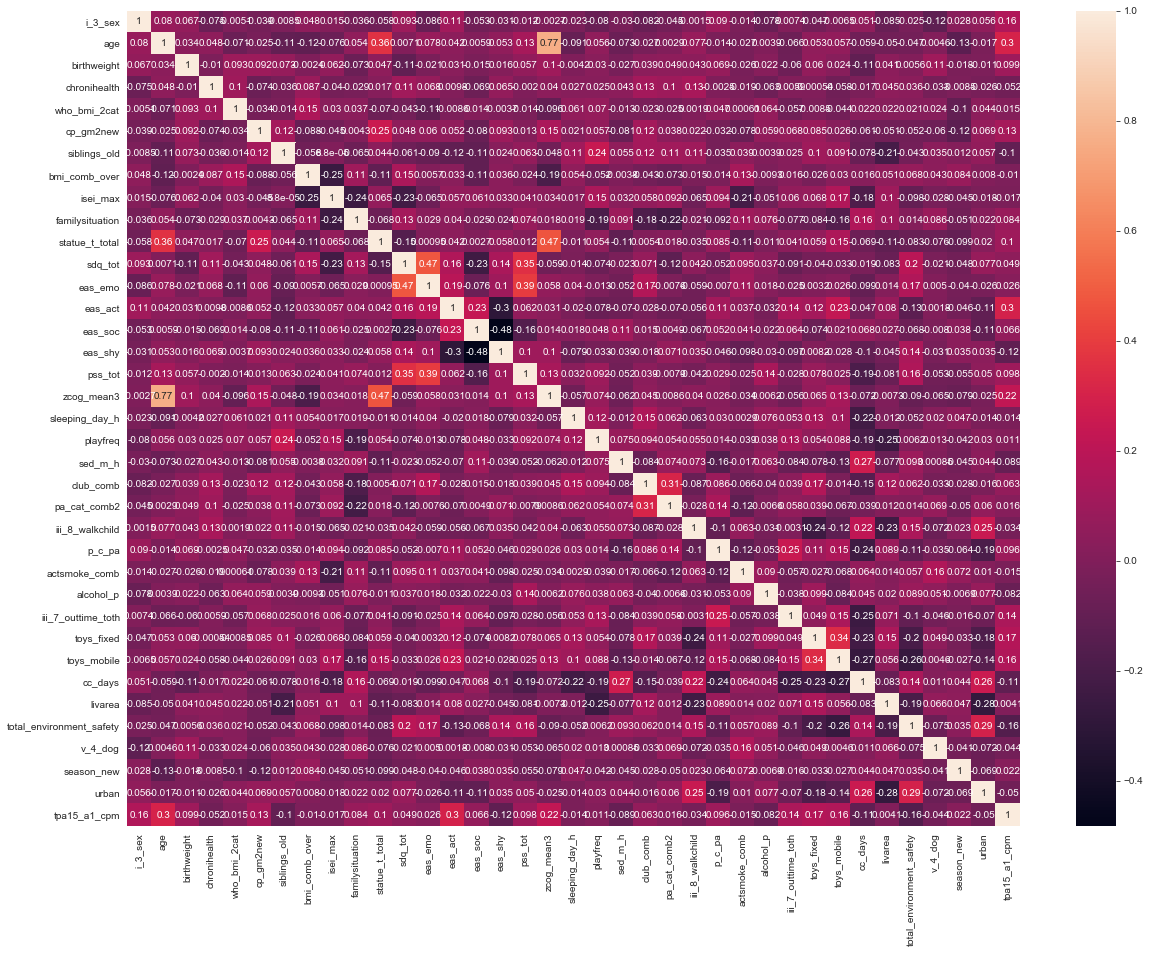

In [56]:
corr_matrix = df.corr()
fig, axs = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True)

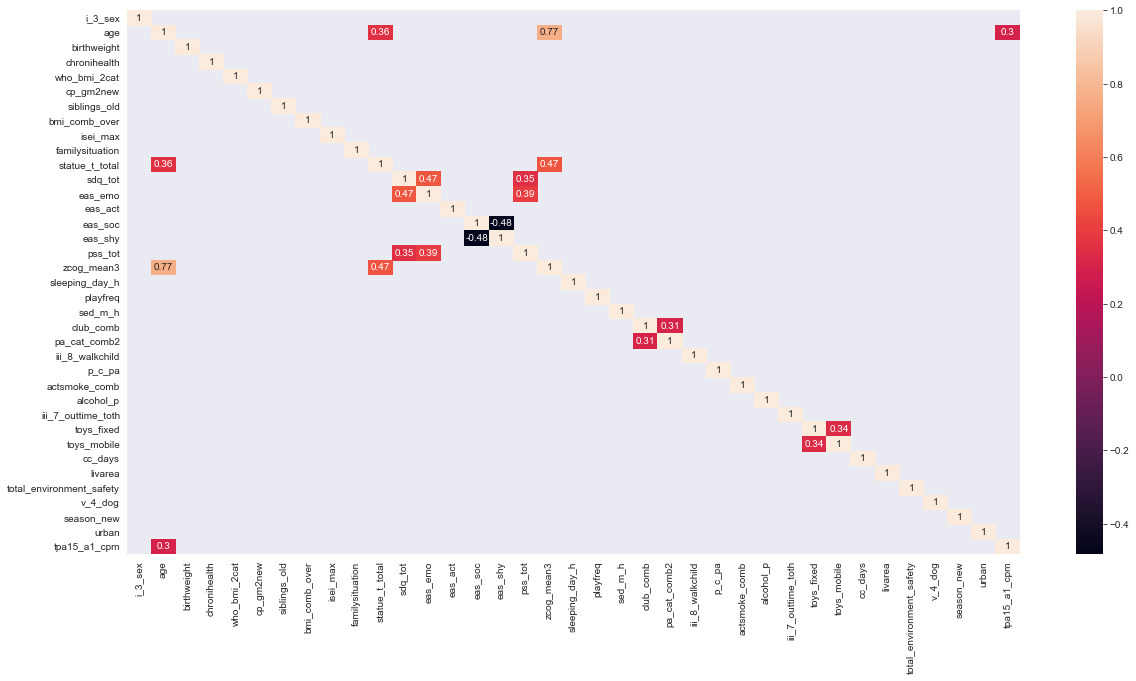

In [57]:
threshold = 0.3
cond_corr_matrix = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

fig, axs = plt.subplots(figsize=(20, 10))
sns.heatmap(cond_corr_matrix, annot=True)

That is, there seems to be low correlation. However, we might try ridge, lasso or elastic net to remove variables.

### Lasso

It is important to standardize the features by removing the mean and scaling to unit variance. The L1 (Lasso) and L2 (Ridge) regularizers of linear models assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [58]:
dfs = df.astype('int')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16276
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   i_3_sex                   16277 non-null  int64
 1   age                       16277 non-null  int64
 2   birthweight               16277 non-null  int64
 3   chronihealth              16277 non-null  int64
 4   who_bmi_2cat              16277 non-null  int64
 5   cp_gm2new                 16277 non-null  int64
 6   siblings_old              16277 non-null  int64
 7   bmi_comb_over             16277 non-null  int64
 8   isei_max                  16277 non-null  int64
 9   familysituation           16277 non-null  int64
 10  statue_t_total            16277 non-null  int64
 11  sdq_tot                   16277 non-null  int64
 12  eas_emo                   16277 non-null  int64
 13  eas_act                   16277 non-null  int64
 14  eas_soc                   16277 non-nu

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs.loc[:, df.columns != 'tpa15_a1_cpm'] = scaler.fit_transform(dfs.loc[:, df.columns != 'tpa15_a1_cpm'])
dfs.head()

,i_3_sex,age,birthweight,chronihealth,who_bmi_2cat,cp_gm2new,siblings_old,bmi_comb_over,isei_max,familysituation,...,iii_7_outtime_toth,toys_fixed,toys_mobile,cc_days,livarea,total_environment_safety,v_4_dog,season_new,urban,tpa15_a1_cpm
0,0.924738,-0.584835,1.120146,-0.298297,-0.578651,-0.032380,1.152077,0.941094,-1.794116,-0.348302,...,-0.120702,0.263082,-1.587242,0.195436,-1.984954,3.224890,-0.264196,0.576381,1.343656,561
1,-1.081387,-0.584835,-2.402519,-0.298297,-0.578651,-1.437825,1.152077,0.941094,-0.027761,-0.348302,...,-0.120702,0.263082,0.403425,1.786788,-0.902119,0.502256,-0.264196,0.576381,1.343656,538
2,-1.081387,-0.584835,-0.641187,-0.298297,-0.578651,-0.032380,-0.867998,0.941094,-0.406266,-0.348302,...,-0.756308,0.263082,1.066980,0.195436,0.613850,0.645552,-0.264196,0.576381,-0.744238,475
3,-1.081387,-0.584835,-0.465054,-0.298297,-0.578651,1.373066,-0.867998,0.941094,0.792332,-0.348302,...,-1.391915,-1.074890,-0.923686,0.991112,-0.793835,1.362035,-0.264196,0.576381,1.343656,432
4,0.924738,-0.584835,1.296279,-0.298297,-0.578651,-0.032380,-0.867998,-1.062593,0.666164,-0.348302,...,-1.391915,0.263082,1.066980,1.786788,-0.902119,-0.070931,-0.264196,0.576381,1.343656,342


Split the data set into train and test sets (use X_train, X_test, y_train, y_test), with the first 75% of the data for training and the remaining for testing

### 2. Analysis

We will start by fitting a regular regression model, then look into different regularization techniques. First, the explanatory variables or scaled, so the same data set can be used for all methods.

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV

X = dfs.drop(['tpa15_a1_cpm'], axis=1)
y = dfs['tpa15_a1_cpm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print(X_train.shape)
print(X_test.shape)

(12207, 36)
(4070, 36)


### Linear regression

In [61]:
from statsmodels.api import OLS

#lm = LinearRegression(normalize=False, fit_intercept=True, n_jobs=-1)
OLS(y_train,X_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           tpa15_a1_cpm   R-squared (uncentered):                   0.018
Model:                            OLS   Adj. R-squared (uncentered):              0.015
Method:                 Least Squares   F-statistic:                              6.045
Date:                Wed, 10 Feb 2021   Prob (F-statistic):                    1.54e-27
Time:                        09:02:46   Log-Likelihood:                         -96070.
No. Observations:               12207   AIC:                                  1.922e+05
Df Residuals:                   12171   BIC:                                  1.925e+05
Df Model:                          36                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
i_3_sex                     11.8205      6.183      1.912      0.056      -0.299      23.940
age                         35.3174      7.677      4.600      0.000      20.269      50.366
birthweight                 14.2144      6.069      2.342      0.019       2.317      26.112
chronihealth               -12.5749      6.124     -2.053      0.040     -24.580      -0.570
who_bmi_2cat                13.0704      6.086      2.148      0.032       1.140      25.001
cp_gm2new                   14.3991      6.232      2.310      0.021       2.183      26.615
siblings_old               -14.7969      6.449     -2.294      0.022     -27.439      -2.155
bmi_comb_over               -0.3670      6.315     -0.058      0.954     -12.746      12.012
isei_max                    -4.1448      6.702     -0.618      0.536     -17.282       8.992
familysituation             19.5499      6.527      2.995      0.003       6.756      32.344
statue_t_total             -12.0919      6.825     -1.772      0.076     -25.470       1.287
sdq_tot                     12.4594      7.736      1.611      0.107      -2.704      27.623
eas_emo                    -11.9622      7.214     -1.658      0.097     -26.103       2.179
eas_act                     20.4628      6.668      3.069      0.002       7.393      33.533
eas_soc                     -4.0463      6.783     -0.597      0.551     -17.342       9.250
eas_shy                    -14.0493      6.667     -2.107      0.035     -27.118      -0.980
pss_tot                      6.0309      6.981      0.864      0.388      -7.653      19.715
zcog_mean3                  24.9238      7.621      3.270      0.001       9.985      39.862
sleeping_day_h              -8.4614      6.266     -1.350      0.177     -20.743       3.820
playfreq                    -3.5545      6.565     -0.541      0.588     -16.423       9.314
sed_m_h                     -1.4261      6.327     -0.225      0.822     -13.827      10.975
club_comb                   19.5656      6.667      2.935      0.003       6.498      32.633
pa_cat_comb2                 8.4583      6.537      1.294      0.196      -4.356      21.272
iii_8_walkchild             -0.6674      6.573     -0.102      0.919     -13.552      12.217
p_c_pa                      -2.3200      6.414     -0.362      0.718     -14.892      10.252
actsmoke_comb               -2.9186      6.243     -0.467      0.640     -15.156       9.319
alcohol_p                  -20.0792      6.188     -3.245      0.001     -32.209      -7.950
iii_7_outtime_toth          19.8346      6.441      3.079      0.002       7.209      32.460
toys_fixed                  10.7641      6.703      1.606      0.108      -2.375      23.903
toys_mob

the maximal penalty yielding nonzero coefficients for the lasso as implemented in sklearn is np.abs(X.T.dot(Y)).max() / len(X)

In [62]:
l1_min_c_ = np.abs(X.T.dot(y)).max() / len(X) 
l1_min_c_

48.478470252371245

In [63]:
lambdas = l1_min_c_ * np.logspace(0, -3.8, 100)
#lambdas=np.array([0.001,0.01,0.1,1])

In [64]:
# Path plot 
plt.style.use('ggplot')

In [65]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV


estimator = Lasso()
param_grid = {"alpha" : lambdas}
param_grid


{'alpha': array([4.84784703e+01, 4.43777285e+01, 4.06238641e+01, 3.71875350e+01,
        3.40418813e+01, 3.11623151e+01, 2.85263284e+01, 2.61133169e+01,
        2.39044194e+01, 2.18823702e+01, 2.00313640e+01, 1.83369324e+01,
        1.67858310e+01, 1.53659356e+01, 1.40661476e+01, 1.28763073e+01,
        1.17871142e+01, 1.07900549e+01, 9.87733574e+00, 9.04182251e+00,
        8.27698445e+00, 7.57684322e+00, 6.93592619e+00, 6.34922364e+00,
        5.81214962e+00, 5.32050613e+00, 4.87045022e+00, 4.45846407e+00,
        4.08132738e+00, 3.73609227e+00, 3.42006024e+00, 3.13076101e+00,
        2.86593330e+00, 2.62350708e+00, 2.40158743e+00, 2.19843973e+00,
        2.01247607e+00, 1.84224288e+00, 1.68640953e+00, 1.54375796e+00,
        1.41317313e+00, 1.29363433e+00, 1.18420719e+00, 1.08403638e+00,
        9.92338905e-01, 9.08398022e-01, 8.31557608e-01, 7.61217043e-01,
        6.96826510e-01, 6.37882704e-01, 5.83924890e-01, 5.34531311e-01,
        4.89315881e-01, 4.47925176e-01, 4.10035666e-01,

In [66]:
n_folds = 10
cv = GridSearchCV(estimator, param_grid, cv=n_folds, scoring='neg_mean_squared_error')
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([4.84784703e+01, 4.43777285e+01, 4.06238641e+01, 3.71875350e+01,
       3.40418813e+01...
       4.11947467e-02, 3.77101273e-02, 3.45202681e-02, 3.16002357e-02,
       2.89272056e-02, 2.64802844e-02, 2.42403455e-02, 2.21898807e-02,
       2.03128625e-02, 1.85946193e-02, 1.70217204e-02, 1.55818713e-02,
       1.42638176e-02, 1.30572566e-02, 1.19527572e-02, 1.09416863e-02,
       1.00161408e-02, 9.16888623e-03, 8.39329998e-03, 7.68331975e-03])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [118]:
scores = -cv.cv_results_['mean_test_score']
scores_std = cv.cv_results_['std_test_score']

best_lambd = cv.best_params_['alpha']



In [74]:
#Code to find one sd rule lambda

index_best = np.argmax(cv.cv_results_['mean_test_score']) #index of best one
errorbest = -cv.cv_results_['mean_test_score'][index_best]
sdbest = cv.cv_results_['std_test_score'][index_best]

upper_bound = errorbest+sdbest

onesd = best_lambd #start at best and move to the left
erroronesd = errorbest
i = index_best

for j in range(len(lambdas)):
    i=i-1
    onesd= lambdas[i]
    erroronesd=  -cv.cv_results_['mean_test_score'][i]
    if erroronesd > upper_bound:
        i=i+1
        onesd= lambdas[i]
        erroronesd=  -cv.cv_results_['mean_test_score'][i]
        break


764.2452375323097


Text(0.5, 1.0, 'Confidence bands for mse')

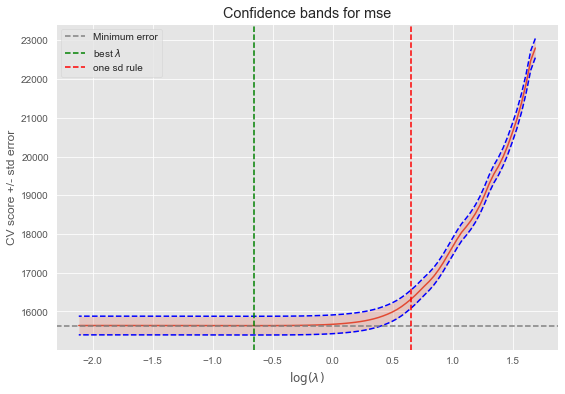

In [77]:
#plot
plt.figure(figsize=(9,6))
plt.plot(np.log10(lambdas), scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.plot(np.log10(lambdas), scores + std_error, 'b--')
plt.plot(np.log10(lambdas), scores - std_error, 'b--')

plt.fill_between(np.log10(lambdas), scores + std_error, scores - std_error, alpha=0.2)
plt.ylabel('CV score +/- std error')
plt.xlabel(r'$\log(\lambda)$')
plt.axhline(np.min(scores), linestyle='--', color='.5', label='Minimum error')
plt.axvline(np.log10(best_lambd) , linestyle='dashed', color='green', label='best '+r'$\lambda$')
plt.axvline(np.log10(onesd), linestyle='dashed', color='red', label='one sd rule')
plt.legend()
plt.title('Confidence bands for mse') 

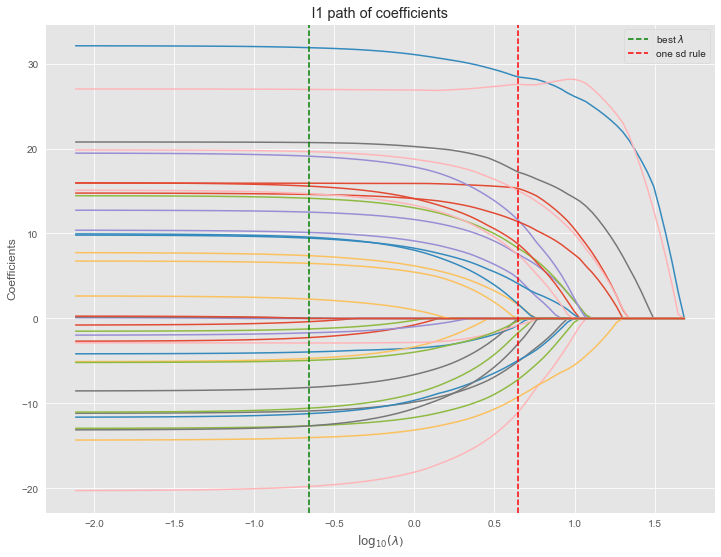

In [81]:
clf = Lasso()
coefs_ = []

for alpha in lambdas:
    clf.set_params(alpha=alpha)
    clf.fit(X_train, np.ravel(y_train))
    coefs_.append(clf.coef_.ravel().copy())

coefs_ = np.array(coefs_)
plt.figure(figsize=(12,9))
plt.plot(np.log10(lambdas), coefs_) #proper value of lambda should be -np.log10(cs)
ymin, ymax = plt.ylim()
plt.xlabel(r'$\log_{10}(\lambda$)')
plt.ylabel('Coefficients')
plt.axvline(np.log10(best_lambd) , linestyle='dashed', color='green', label='best '+r'$\lambda$')
plt.axvline(np.log10(onesd), linestyle='dashed', color='red', label='one sd rule')
plt.legend()
plt.title('l1 path of coefficients')
plt.axis('tight')
plt.show()

## Best Lasso

In [82]:
best_lasso = cv.best_estimator_
print(best_lasso.coef_)

[ 15.91632253  31.86624968  12.51379693 -10.88024843   7.38551333
  14.14479234 -19.76238656  -0.37564777  -3.93972     19.09454754
  -8.11420761   6.48467453 -10.55887165  26.95589305  -2.24717994
 -11.19761302  10.12064589  20.70511297  -4.70255575  -1.23167196
  -2.88607143  15.57038496   9.57064536   0.           0.05014738
   2.27747895 -12.63359861  19.63258621  14.59831591   9.45050815
  -1.68794908 -12.64012843 -14.0214986   -4.93502318  14.68293073
   0.        ]


In [30]:
np.sum(best_lasso.coef_ != 0)

34

In [109]:
np.where(best_lasso.coef_ != 0)[0]
index_best = best_lasso.coef_!=0
index_best

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False])

In [110]:
np.where(best_lasso.coef_ == 0)[0]

array([23, 35])

In [111]:
X_test_best = X_test.loc[:,index_best]
X_test_best = sm.add_constant(X_test_best)

X_test_best.head(5)
X_test.shape

(4070, 36)

In [112]:
results = sm.OLS(y_test, X_test_best).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           tpa15_a1_cpm   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     59.30
Date:                Wed, 10 Feb 2021   Prob (F-statistic):          9.88e-324
Time:                        09:45:24   Log-Likelihood:                -25367.
No. Observations:                4070   AIC:                         5.080e+04
Df Residuals:                    4035   BIC:                         5.102e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Onesd Lasso

In [96]:
onesd_lasso = Lasso()
onesd_lasso.set_params(alpha=onesd)
onesd_lasso.fit(X_train, np.ravel(y_train))


Lasso(alpha=4.458464066677436, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [97]:
print(onesd_lasso.coef_)

[ 15.29679705  28.40637952   7.54009749  -5.04275674   1.59809329
   8.24436333 -10.9966202    0.          -0.76721383  11.54057776
  -0.           0.          -1.6503322   27.55120319  -0.
  -4.931719     4.68343403  17.22066361  -0.          -0.
  -0.75945951   8.73482625   1.66119581  -0.           0.
   0.          -7.16226231  15.00925273  11.37866474   4.07470063
  -0.          -2.93435432  -9.20724231  -0.26138205   7.460887
   0.        ]


In [103]:
np.sum(onesd_lasso.coef_ != 0)

25

In [113]:
np.where(onesd_lasso.coef_ != 0)[0]
index_onesd = onesd_lasso.coef_!=0
np.where(onesd_lasso.coef_ == 0)[0]

array([ 7, 10, 11, 14, 18, 19, 23, 24, 25, 30, 35])

Now that we have found a well-performing model using only 25 predictors, there are several options. One may for instance fit a logistic regression to the test set, using the variables selected by the lasso, to obtain parameter estimates and p-values. Another option is to do bootstrapping on the training data, and fit lasso several times. This will not yield p-values, but interesting information can still be obtained, for example the proportion of times a variable is set to zero. In the following sections, both approaches are tested, starting with bootstrapping.

In [114]:
X_test_onesd = X_test.loc[:,index_onesd]
X_test_onesd = sm.add_constant(X_test_onesd)

X_test_onesd.head(5)

,const,i_3_sex,age,birthweight,chronihealth,who_bmi_2cat,cp_gm2new,siblings_old,isei_max,familysituation,...,club_comb,pa_cat_comb2,alcohol_p,iii_7_outtime_toth,toys_fixed,toys_mobile,livarea,total_environment_safety,v_4_dog,season_new
2663,1.0,0.924738,0.772940,1.120146,-0.298297,-0.578651,1.373066,-0.867998,-0.027761,-0.348302,...,1.531130,-1.239415,-0.241643,-0.120702,-1.074890,-2.914353,-0.902119,0.215662,-0.264196,0.576381
8379,1.0,0.924738,0.772940,0.591746,-0.298297,-0.578651,1.373066,-0.867998,-1.289443,-0.348302,...,-0.653112,0.806833,-0.241643,-0.120702,-1.074890,-0.923686,0.180716,1.791925,-0.264196,0.576381
13497,1.0,-1.081387,-0.584835,-0.288920,-0.298297,-0.578651,1.373066,1.152077,0.476911,-0.348302,...,1.531130,0.806833,-0.241643,-0.756308,0.263082,-0.923686,0.180716,-0.070931,-0.264196,0.576381
1486,1.0,-1.081387,-0.584835,0.944012,-0.298297,-0.578651,-0.032380,-0.867998,1.738593,-0.348302,...,-0.653112,-1.239415,-0.241643,-0.756308,0.263082,0.403425,-0.902119,0.358959,-0.264196,0.576381
2220,1.0,-1.081387,0.772940,0.944012,-0.298297,-0.578651,-0.032380,-0.867998,0.224575,-0.348302,...,1.531130,-1.239415,-0.241643,-0.756308,2.270039,1.066980,0.722134,-1.503897,-0.264196,-1.734964


In [115]:
results = sm.OLS(y_test, X_test_onesd).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           tpa15_a1_cpm   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     78.37
Date:                Wed, 10 Feb 2021   Prob (F-statistic):          2.47e-323
Time:                        09:45:41   Log-Likelihood:                -25388.
No. Observations:                4070   AIC:                         5.083e+04
Df Residuals:                    4044   BIC:                         5.099e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Bootstrap Lasso

In [138]:
from random import choices
def BSlasso( X, y, lambdas, B=1000, n_folds=10):
    N = len(y)
    p = X.shape[1]
    coefs_matrix = np.zeros((B,p)) # Bxp - matrix, each row contains coefficient values for one bootstrap sample
    error_matrix = np.zeros((B, len(lambdas))) # Bx len(cs), matrix, each row contains the error for one bootstrap sample
    
    
    for b in range(B):
        # print(b)
        bootstrap_indexes = choices(np.arange(N),k=N) # sampling k=N indexes with replacement
        #print(bootstrap_indexes)
        X_boot = X.iloc[bootstrap_indexes,:]
        y_boot = y.iloc[bootstrap_indexes]

        #Cross validation for bootstrap sample
        estimator = Lasso()
        param_grid = {"alpha" : lambdas}
        cv = GridSearchCV(estimator, param_grid, cv=n_folds, scoring='neg_mean_squared_error')
        cv.fit(X_boot, y_boot)

        coefs_matrix[b,:] = cv.best_estimator_.coef_
        error_matrix[b, :] = -cv.cv_results_['mean_test_score'] #we use the best lambda

    zero_elements = np.zeros(p) # is element of this list counts the relative number of times each elements coeff are zero
    for j in range(p):
        zero_elements[j] = 1-(np.count_nonzero(coefs_matrix[:,j])/B) #how many times ==0

    return coefs_matrix, error_matrix, zero_elements

In [143]:
bootstrap_size=50
coefs, errors, zeros= BSlasso(X_train, y_train, lambdas, B=bootstrap_size, n_folds=10)

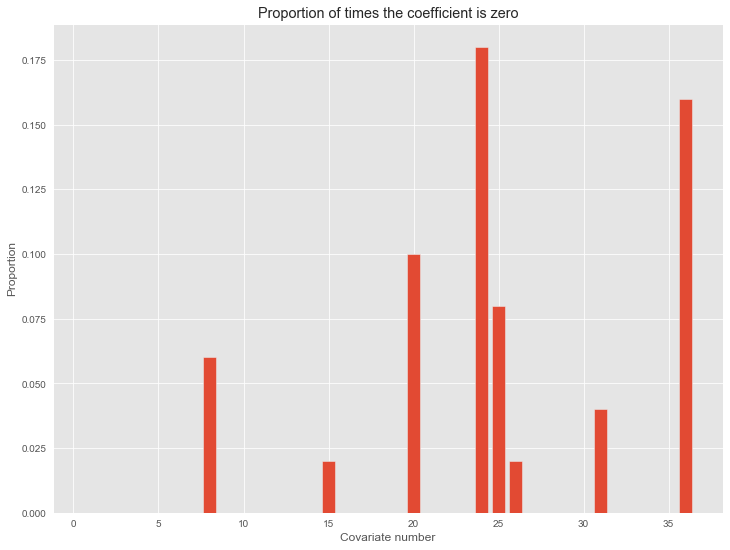

In [144]:
p = X_train.shape[1]
plt.figure(figsize=(12,9))
plt.bar(np.arange(1, p+1, 1), zeros)
plt.savefig("nonzero_coefs_B=%s.pdf" % bootstrap_size)
plt.title('Proportion of times the coefficient is zero') #proper title???
plt.xlabel('Covariate number')
plt.ylabel('Proportion')
plt.savefig('BSprops.png', dpi=500)
plt.show()

In [35]:
X_test_ = X_test.loc[:,index]
X_test_ = sm.add_constant(X_test_)

X_test_.head(5)

,const,i_3_sex,age,birthweight,who_bmi_2cat,cp_gm2new,familysituation,sdq_tot,eas_act,pss_tot,zcog_mean3,club_comb,pa_cat_comb2,p_c_pa,actsmoke_comb,iii_7_outtime_toth,toys_fixed,toys_mobile,season_new
2663,1.0,0.924738,0.772940,1.120146,-0.578651,1.373066,-0.348302,-0.647475,-0.519221,1.456516,1.978764,1.531130,-1.239415,-1.329205,1.675821,-0.120702,-1.074890,-2.914353,0.576381
8379,1.0,0.924738,0.772940,0.591746,-0.578651,1.373066,-0.348302,0.022359,0.759158,-0.432233,-0.126219,-0.653112,0.806833,-1.329205,-0.596722,-0.120702,-1.074890,-0.923686,0.576381
13497,1.0,-1.081387,-0.584835,-0.288920,-0.578651,1.373066,-0.348302,0.022359,-0.519221,-0.027501,-0.126219,1.531130,0.806833,0.752329,-0.596722,-0.756308,0.263082,-0.923686,0.576381
1486,1.0,-1.081387,-0.584835,0.944012,-0.578651,-0.032380,-0.348302,1.138751,2.037537,1.051784,-0.126219,-0.653112,-1.239415,0.752329,-0.596722,-0.756308,0.263082,0.403425,0.576381
2220,1.0,-1.081387,0.772940,0.944012,-0.578651,-0.032380,-0.348302,-1.763867,0.759158,-0.297322,-0.126219,1.531130,-1.239415,0.752329,-0.596722,-0.756308,2.270039,1.066980,-1.734964


In [36]:
results = sm.OLS(y_test, X_test_).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           tpa15_a1_cpm   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     87.91
Date:                Wed, 10 Feb 2021   Prob (F-statistic):          2.42e-273
Time:                        08:36:47   Log-Likelihood:                -25521.
No. Observations:                4070   AIC:                         5.108e+04
Df Residuals:                    4051   BIC:                         5.120e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                622.7976      2

### Elastic net

In [105]:
from sklearn.linear_model import ElasticNet

alpha_values = np.array(list(map(lambda x: 1/10**x, np.arange(2,6))))
l1_ratio_values = np.arange(0, 0.1, 0.01)
param_grid = {"alpha" : alpha_values,
              "l1_ratio" : l1_ratio_values}
cv = GridSearchCV(ElasticNet(),
                 param_grid=param_grid, cv=5, n_jobs=-1)

cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': array([1.e-02, 1.e-03, 1.e-04, 1.e-05]),
                         'l1_ratio': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [106]:
alpha_values

array([1.e-02, 1.e-03, 1.e-04, 1.e-05])

In [107]:
params = cv.best_params_
print(params)
cv.best_score_

{'alpha': 0.001, 'l1_ratio': 0.09}


0.31207290595201986

In [94]:
params['l1_ratio']

0.09

In [108]:
lm = ElasticNet(alpha = params['alpha'], l1_ratio = params['l1_ratio'])

lm.fit(x_train, y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.09,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [109]:
best_net = cv.best_estimator_
print(best_net.coef_)
y_pred = lm.predict(x_test)
mse = np.mean(np.power(y_test - y_pred, 2))
rmse = np.sqrt(mse)
print("MSE: {0} | RMSE: {1}".format(mse, rmse))

[ 28.40710629  77.95097338   2.46240277 -34.21174761  21.49678753
  20.92547027 -40.94894921  -4.22677553  -0.09152294  68.18157579
  -0.46539639   1.21743921 -16.59314439  40.30152454  -5.7155854
 -15.68854422   1.50977924 -16.88525018  -7.56861259   4.45812272
   0.91187544  33.35312801  19.68016675  -0.88922412   2.11212866
   9.95031527 -62.62327223  11.37356672  10.45112297   7.21482623
  -5.01506095  -1.15762383  -2.0932593  -26.65618844  42.46752564
   7.2477075 ]
MSE: 15840.41196906284 | RMSE: 125.85869842431566


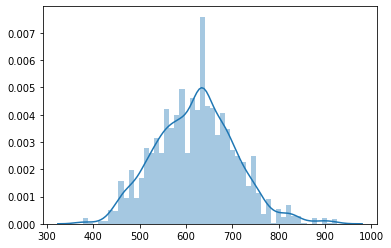

In [110]:
sns.distplot(y_pred,bins=50)

In [22]:
# Define the model (check with LM to start with)
model = sk.linear_model.LinearRegression()
# Do k-fold validation. This feels very wrong, not to split according to code
kfold = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)




model.fit(X,y)
y_pred = model.predict(X)
regression_results(y, y_pred)


scores = []
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)
print(scores)



#do elastic net! 1%99% ridge, lasso
model = sk.linear_model.ElasticNet(l1_ratio = 1)

model.fit(X,y)
y_pred = model.predict(X)
regression_results(y, y_pred)
print(model.coef_)


scores = []
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)
print(scores)

explained_variance:  0.3112
mean_squared_log_error:  0.0426
r2:  0.3112
MAE:  100.2115
median_absolute_error 86.4135
MSE:  15697.3808
RMSE:  125.2892
[0.2875485786558474, 0.3168361645798503, 0.3161251129868603, 0.283236776640578, 0.3306760333916485]
explained_variance:  0.3034
mean_squared_log_error:  0.0429
r2:  0.3034
MAE:  100.242
median_absolute_error 87.2072
MSE:  15876.1931
RMSE:  126.0008
[  0.          27.50116018  65.84190526   2.1324971  -18.18646928
  13.94875383  18.77309491 -32.42490837   0.          -0.13727509
  45.7652717   -0.60203388   0.96949898 -11.84123409  38.97401768
   0.         -12.92071328   1.54029883  -6.92120792  -4.35746973
  -0.          -0.          25.14642079  10.73363177  -0.
   0.           0.         -39.10301041  11.10141957  10.08324661
   5.63656224  -2.71415387  -1.15208639  -2.1151752   -7.84156963
  33.6575261    0.36823766]
[0.2841070121585578, 0.30970147432644524, 0.3051234836699852, 0.2785994740096833, 0.32178874228917664]


In [23]:
cool_vars = list(df.columns)
if 'code' in cool_vars: 
    cool_vars.remove('code')
# Drop nan-values from dataset?
df_clean = df.dropna()

X = df_clean.iloc[:,2:-1]
y = df_clean.iloc[:,-1]
X = sm.add_constant(X)

# Define the model (check with LM to start with)
model = sk.linear_model.LinearRegression()
# Do k-fold validation. This feels very wrong, not to split according to code
kfold = sk.model_selection.KFold(n_splits=5, shuffle=True, random_state=12345)




model.fit(X,y)
y_pred = model.predict(X)
regression_results(y, y_pred)


scores = []
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)
print(scores)



#do elastic net! 1%99% ridge, lasso
model = sk.linear_model.ElasticNet(l1_ratio = 1)

model.fit(X,y)
y_pred = model.predict(X)
regression_results(y, y_pred)
print(model.coef_)


scores = []
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train])
    score = model.score(X.iloc[test,:], y.iloc[test])
    scores.append(score)
print(scores)

explained_variance:  0.3112
mean_squared_log_error:  0.0426
r2:  0.3112
MAE:  100.2115
median_absolute_error 86.4135
MSE:  15697.3808
RMSE:  125.2892
[0.2875485786558474, 0.3168361645798503, 0.3161251129868603, 0.283236776640578, 0.3306760333916485]
explained_variance:  0.3034
mean_squared_log_error:  0.0429
r2:  0.3034
MAE:  100.242
median_absolute_error 87.2072
MSE:  15876.1931
RMSE:  126.0008
[  0.          27.50116018  65.84190526   2.1324971  -18.18646928
  13.94875383  18.77309491 -32.42490837   0.          -0.13727509
  45.7652717   -0.60203388   0.96949898 -11.84123409  38.97401768
   0.         -12.92071328   1.54029883  -6.92120792  -4.35746973
  -0.          -0.          25.14642079  10.73363177  -0.
   0.           0.         -39.10301041  11.10141957  10.08324661
   5.63656224  -2.71415387  -1.15208639  -2.1151752   -7.84156963
  33.6575261    0.36823766]
[0.2841070121585578, 0.30970147432644524, 0.3051234836699852, 0.2785994740096833, 0.32178874228917664]
